# Phase 3 :

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Dataset/The_Processed_data.csv');
print(df)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Balance Data:

Check if the data is balanced or not:


In [2]:
value = df['Heart Attack Risk']

num1 = value[value == 1].count()
num2 = value[value == 0].count()

total = num1 + num2
percentage1= (num1 / total) * 100
percentage2 = (num2 / total) * 100

print("Number of people that have a risk of heart attack :", num1)
print("Number of people that have not a risk of heart attack.", num2)
print(" ")
print("Percentage of people who have a risk of heart attack: {:.2f}%".format(percentage1))
print("Percentage of people who have not a risk of heart attack: {:.2f}%".format(percentage2))

Number of people that have a risk of heart attack : 1852
Number of people that have not a risk of heart attack. 2148
 
Percentage of people who have a risk of heart attack: 46.30%
Percentage of people who have not a risk of heart attack: 53.70%



The number of people is 4000; we note that 1852 are at risk of having a heart attack, while 2148 are not at risk. In addition, we note that the data is balanced, as the percentage of those exposed to a risk is 46.3% and the percentage of those not exposed is 53.7%.

# Classification:

# Split the data into features and target variable

The code separates the features from the target variable, where X contains the features (all columns except the last one), and y contains the target variable "Heart Attack Risk."

In [3]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Information Gain (entropy):
# Splitting Data into: 70% Training and 30% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf_entropy= clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict (X_test)

# confusion matrix:


[[362 264]
 [291 283]]


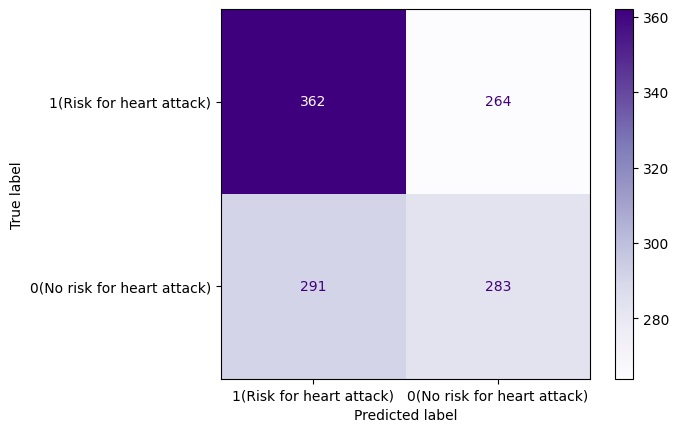

In [5]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (362): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 362 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (264): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 264 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (291): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 291 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (283): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 283 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

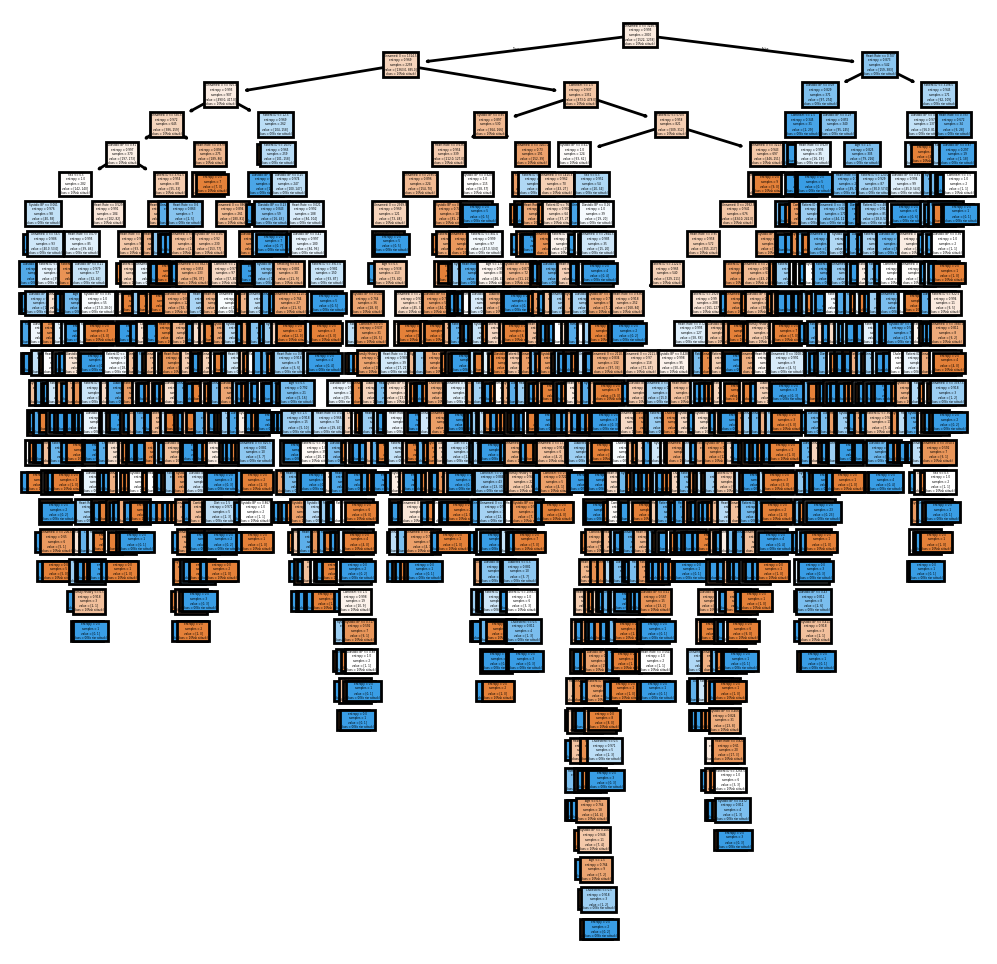

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

The result of the code is a visual representation of a decision tree that illustrates how the data is split based on different features to determine the risk of heart attack. The tree begins at the root node, where the first feature is evaluated, and continues to branch out based on specific threshold values for various attribute. Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack. 

Overall, this decision tree provides insight into how the model makes classifications based on different health indicators, making it a valuable tool for understanding and interpreting heart attack risk assessments.

# Completing in model evaluation and selection:


In [7]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5375
Error Rate: 0.4625
Sensitivity: 0.4930313588850174
Specificity: 0.5782747603833865
Precision: 0.5173674588665448


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 57%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.


Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 57%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 60% Training and 40% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred_entropy2 = clf2.predict (X_test)

# confusion matrix:

[[487 361]
 [382 370]]


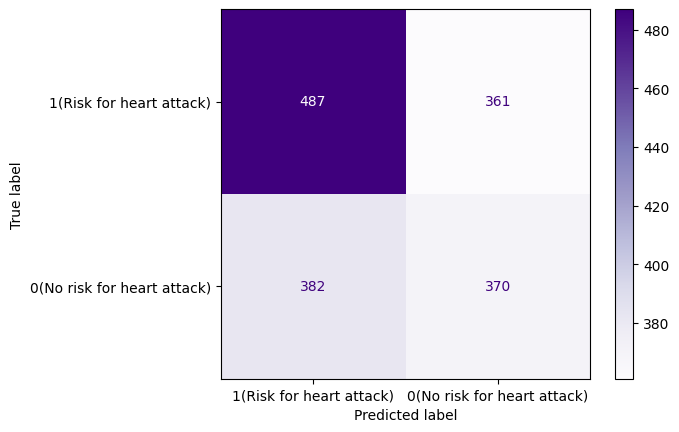

In [9]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy2)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (487): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 487 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (361): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 361 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (382): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 382 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (370): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 370 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

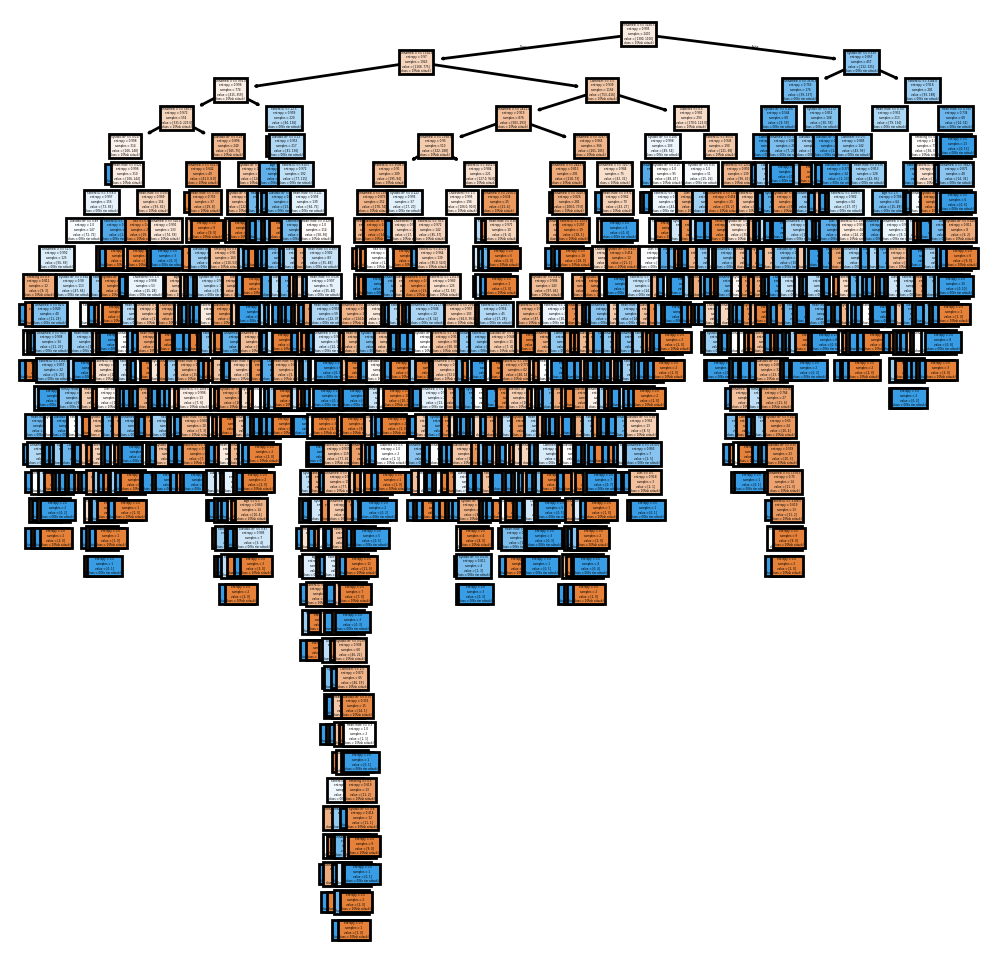

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In this tree, data is split across multiple nodes representing decisions or conditions that lead to final classifications, in this case, "risk attack" and "no risk attack." Each node includes specific criteria and classification outcomes, with each level of the tree representing a decision step based on particular data features. This visualization helps in understanding the decision-making process and analyzing the data features in detail. However, it appears complex and somewhat difficult to read due to the tree’s depth and numerous branches, which suggests a complex model with many sub-decisions required to reach a final classification.

# Completing in model evaluation and selection:

In [12]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.535625
Error Rate: 0.464375
Sensitivity: 0.4920212765957447
Specificity: 0.5742924528301887
Precision: 0.506155950752394


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 57%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 50%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 57%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 50%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3. fit (X_train, y_train)

y_pred_entropy3 = clf3.predict (X_test)

# confusion matrix:

[[500 348]
 [377 375]]


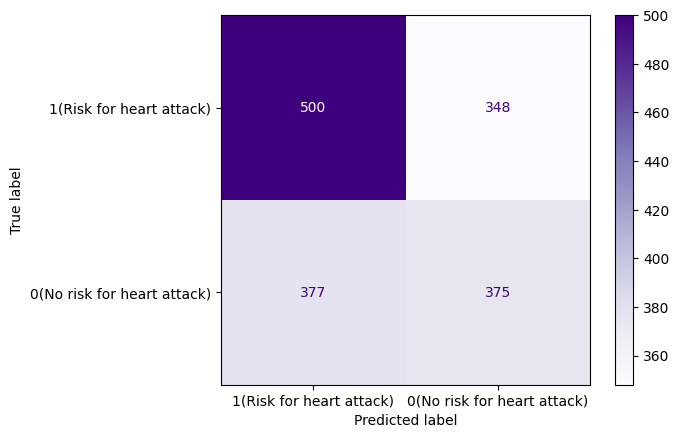

In [14]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy3)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (500): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 500 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (348): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 348 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (377): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 377 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (375): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 375 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

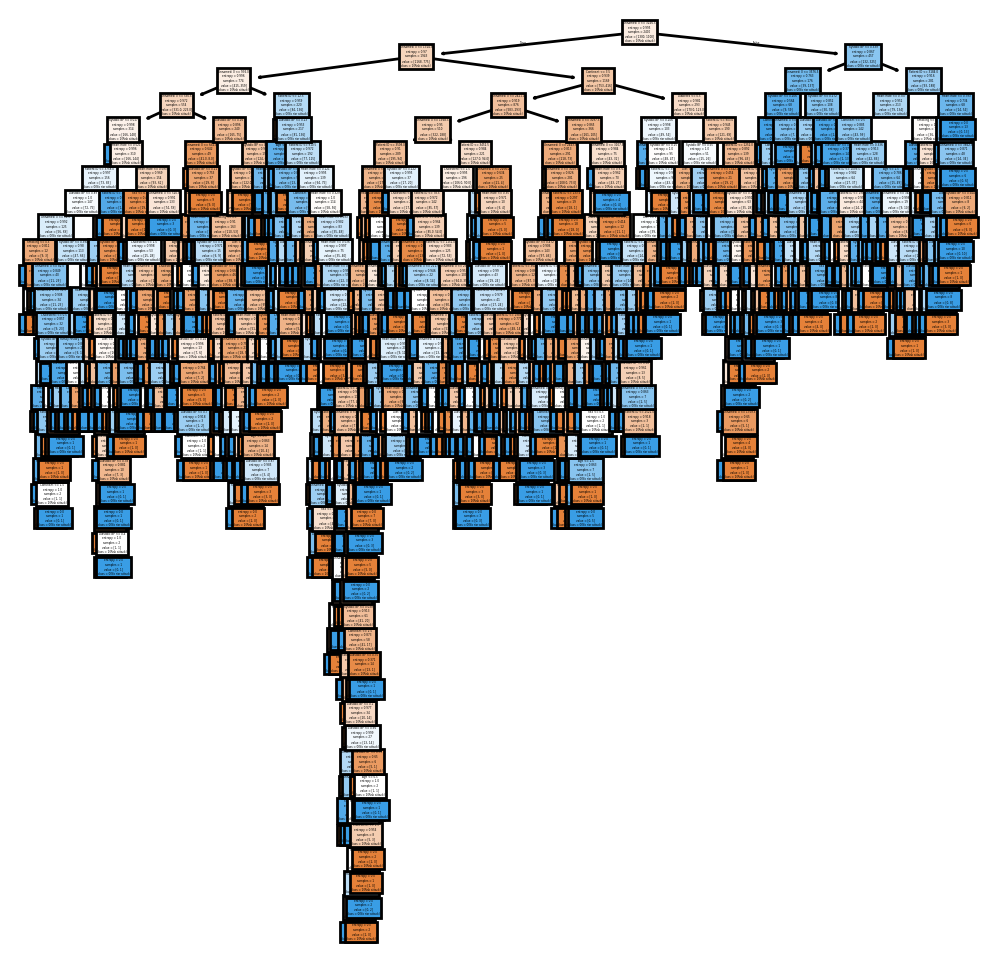

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

This image shows a complex Decision Tree used to classify data into two categories: "Risk attack" and "No risk attack." The tree starts from a root node, which represents the initial decision point, and branches out through multiple nodes that evaluate specific features or conditions in the data. At each node, the data is directed based on the results of these conditions until it reaches a leaf node, which represents the final classification.

While this tree provides a detailed view of the decision-making process, the high number of nodes and branches makes it challenging to read and interpret. This complexity reflects the model’s depth and the significant number of factors it analyzes to reach a classification decision. The visualization highlights both the model's power and the difficulty of manually tracing its decision 

# Completing in model evaluation and selection:

In [16]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy3)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.546875
Error Rate: 0.453125
Sensitivity: 0.49867021276595747
Specificity: 0.589622641509434
Precision: 0.5186721991701245


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 51%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 51%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Evaluate the models of INFORMATION GAIN :

In [18]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.5375", "0.4625", "0.4930313588850174", "0.5782747603833865", "0.5173674588665448"
    ],
    "60% training, 40% testing	": [
        "0.535625", "0.464375", "0.4920212765957447", "0.5742924528301887", 
        "0.506155950752394 "    
    ],
    "	80% training, 20% testing": [
        "0.546875", "0.453125", "0.498670212765747", "0.589622641509434","0.5186721991701245"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.5375,0.535625,0.546875
1,Error Rate,0.4625,0.464375,0.453125
2,Sensitivity,0.4930313588850174,0.4920212765957447,0.498670212765747
3,Specificity,0.5782747603833865,0.5742924528301887,0.589622641509434
4,Precision,0.5173674588665448,0.506155950752394,0.5186721991701245


The Information Gain results show the following model performance across different data splits for training and testing:

- Accuracy: The model trained on a 80% training set and 20% testing set achieved the highest accuracy at 0.546875 (or 54.6%), followed by the model trained on 70% training and 30% testing with an accuracy of 0.5375 (or 53.75%), and the model trained on 60% training and 40% testing with an accuracy of 0.535625 (or 53.56%).

- Error Rate: The model trained on a 60% training set and 40% testing set had the highest error rate at 0.464375 (or 46.43%), followed by the model trained on 70% training and 30% testing with an error rate of 0.4625 (or 46.25%), and the model trained on 80% training and 20% testing with an error rate of 0.453125  (or 45.3%).

- Sensitivity: The model trained on a 80% training set and 20% testing set achieved the highest sensitivity at 0.498670212765747 (or 49.86%), followed by the model trained on 70% training and 30% testing with 0.4930313588850174 (or 49.3%), and the model trained on 60% training and 40% testing with 0.4920212765957447 (or 49.2%).

- Specificity: The model trained on an 80% training set and 20% testing set obtained the highest specificity at 0.589622641509434 (or 58.96%), followed by the model trained on 70% training and 30% testing with 0.5782747603833865 (or 57.82%), and the model trained on 60% training and 40% testing with 0.5742924528301887 (or 57.42%).

- Precision: The model trained on a 80% training set and 20% testing set achieved the highest precision at 0.5186721991701245 (or 51.86%), followed by the model trained on 70% training and 30% testing with 0.5173674588665448 (or 51.7%), and the model trained on 60% training and 40% testing with 0.506155950752394 (or 50.6%).

Based on the values, the 80% training and 20% testing split appears to be the best choice for the model. This split achieves the highest accuracy (54.6%), which is typically a primary metric for assessing overall model performance. It also achieves the highest sensitivity (49.86%), Specificity(58.96%) and precision (51.86%), meaning it is effective at correctly identifying positive cases and minimizing false positives.
Additionally, the error rate for this split (45.3%) is the lowest among the three splits, indicating fewer incorrect predictions. Overall, this balance between sensitivity, specificity, and accuracy suggests it is well-suited for maintaining reliable predictions across different metrics.

# GINI Index 
# Splitting Data into 70% Training and 30% Test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_gini = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini = clf_gini.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

# confusion matrix 

[[358 268]
 [294 280]]


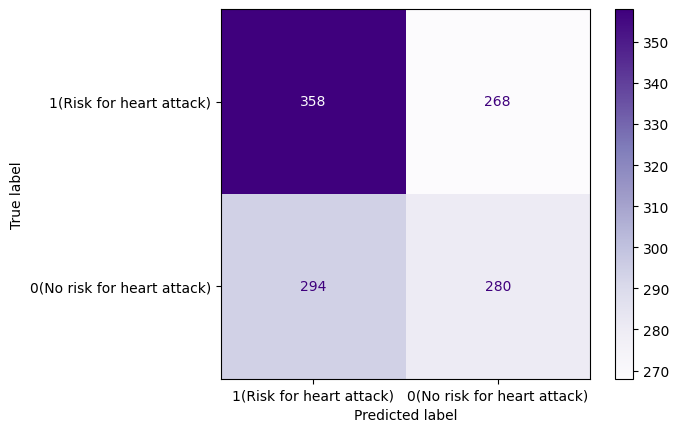

In [20]:
# Compute and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

- Top-left cell (358):Represents the number of true positives (TP). This indicates that 358 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (268):Represents the number of false negatives (FN). This means that 268 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (294): Represents the number of false positives (FP). This shows that 294 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (280):Represents the number of true negatives (TN). This means that 280 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree 


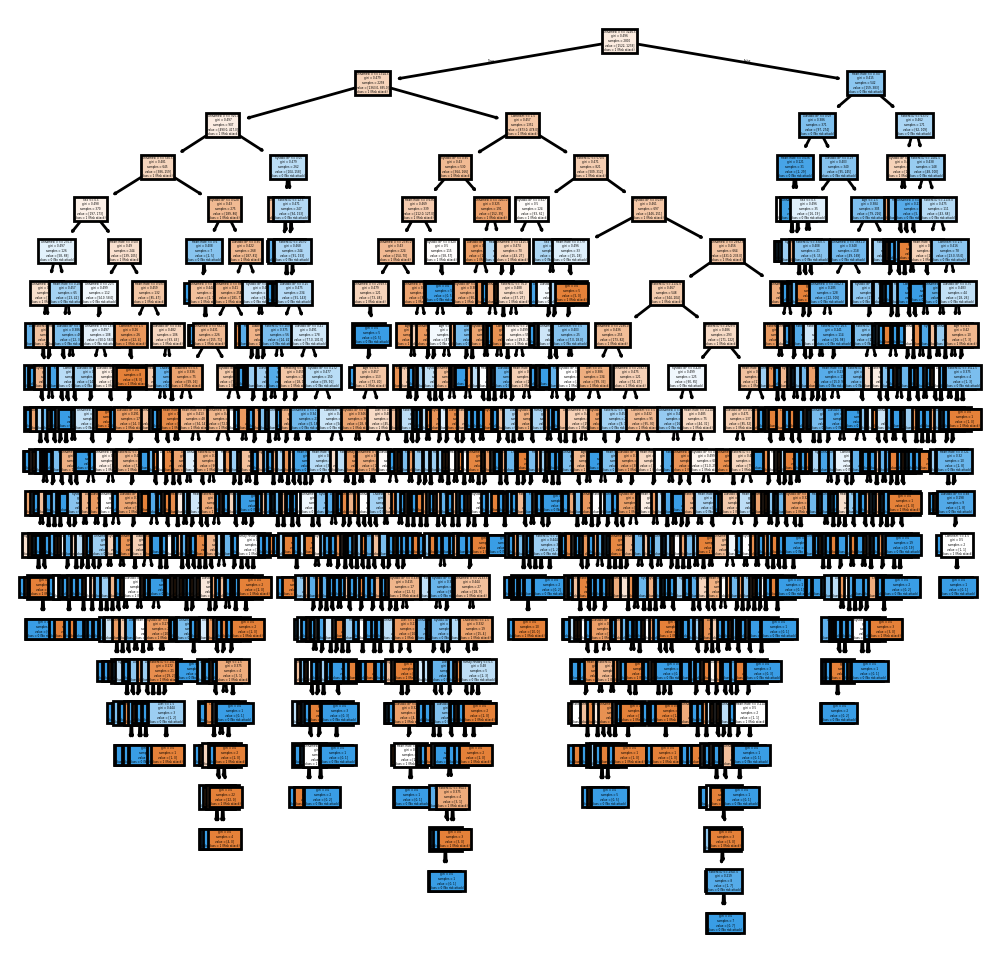

In [21]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()


This code is used to plot a decision tree for a classifier that has been trained using the Gini index as the criterion.

First, it sets up a plot with a figure size of 6x6 inches and a high resolution of 200 DPI.
The `class_labels` dictionary maps class values `1` and `0` to their descriptive labels: `1` corresponds to "Risk attack" and `0` corresponds to "No risk attack."

These labels are then used to display meaningful class names in the decision tree plot.
 The resulting plot allows one to see how the decision tree classifies input data and makes decisions based on the Gini index criterion,Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack.

# Completing in model evaluation and selection:

In [22]:

# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini[1, 1]
TN = cm_gini[0, 0]
FP = cm_gini[0, 1]
FN = cm_gini[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.5316666666666666
Error Rate: 0.4683333333333334
Sensitivity: 0.4878048780487805
Specificity: 0.5718849840255591
Precision: 0.5109489051094891


The results presented are metrics used to evaluate the performance of a classification model. 

1-Accuracy (0.5316):This represents the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the model correctly predicted the class about 53.16% of the time, which indicates that its overall performance is slightly better than random guessing, but it's not very high.

2-Error Rate (0.4683):The error rate is the complement of accuracy, representing the proportion of incorrect predictions made by the model. In this case, the model made errors in about 46.83% of the predictions. This value is high, suggesting the model may not be performing very well.

3-Sensitivity (0.4878):also known as recall or true positive rate, measures the model's ability to correctly identify positive cases (1, "risk attack"), a sensitivity of 48.78% means that the model correctly identified approximately 49% of the actual positive cases, but it failed to identify more than half of the actual positives.

4-Specificity (0.5718):also known as the true negative rate, measures the model's ability to correctly identify negative cases (0, "No risk attack"). A specificity of 57.18% means the model correctly identified the cases where there was no risk of an attack. This shows that the model is slightly better at identifying negative cases than positive ones.

5-Precision (0.5109):measures how many of the positive predictions made by the model are actually correct. With a precision of 51.09%, the model's positive predictions are only about half correct. This suggests the model may have a significant number of false positives (incorrectly labeling non-risk cases as risk).

Overall, the model has moderate performance but struggles with identifying positive cases and has a high error rate.

# Splitting Data into: 60% Training and 40% Test:

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=1)

#Create decision tree classifer object:
clf_gini2 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini2 = clf_gini2.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred_gini2 = clf_gini2.predict(X_test1)

# Confusion Matrix

[[358 268]
 [294 280]]


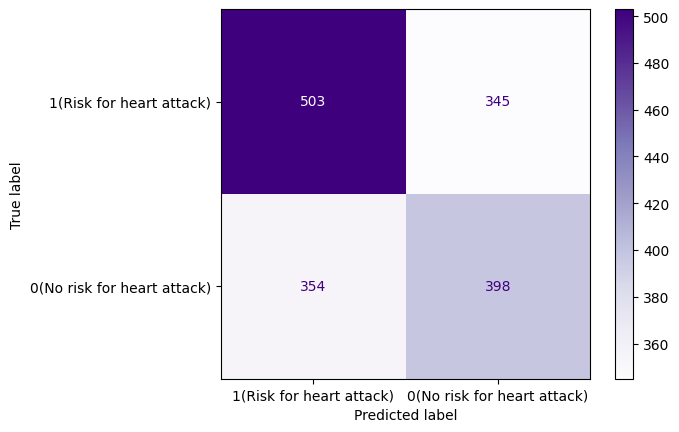

In [24]:
# Compute and print the confusion matrix
cm_gini2= confusion_matrix(y_test1, y_pred_gini2)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini2, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (503):Represents the number of true positives (TP). This indicates that 503 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (345):Represents the number of false negatives (FN). This means that 345 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (354): Represents the number of false positives (FP). This shows that 354 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (398):Represents the number of true negatives (TN). This means that 398 instances without a risk of heart attack were correctly identified as not being at risk.


# Decision Tree 


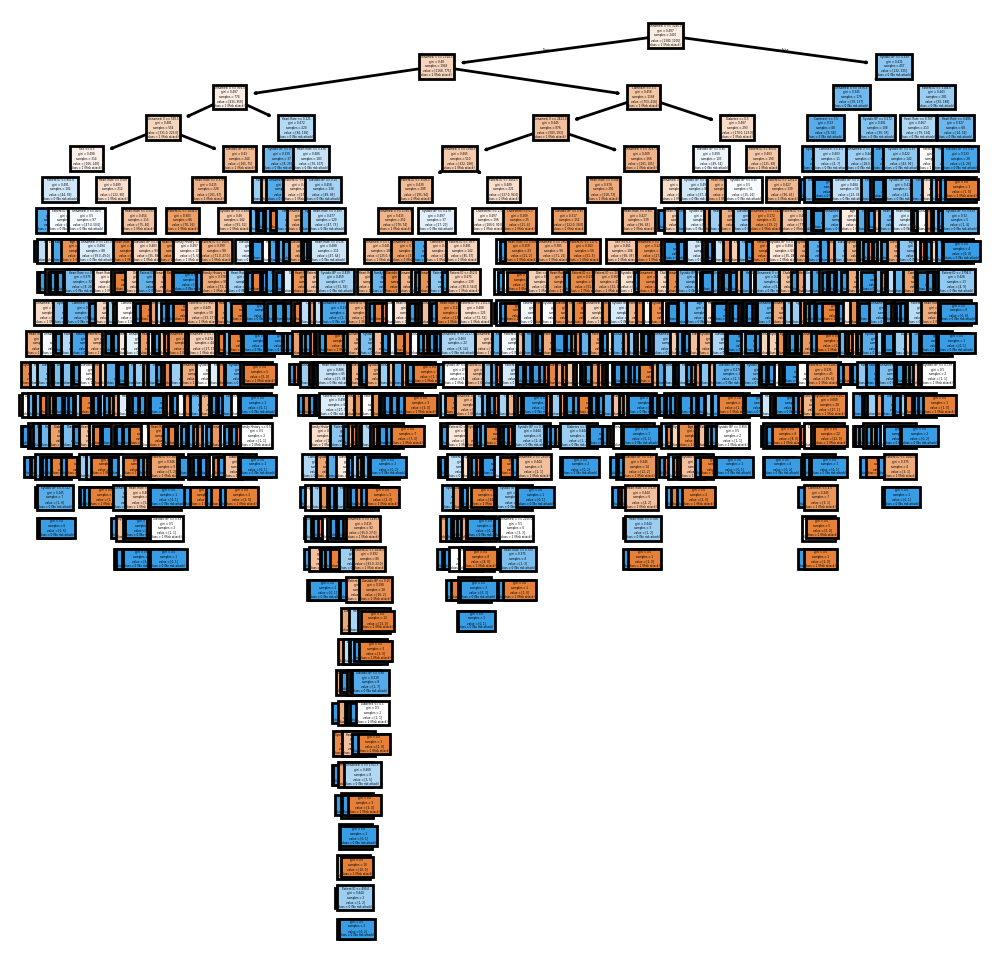

In [25]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, creating a tree-like structure.

In this code, a decision tree is plotted for a classifier trained using the Gini index as the splitting criterion. The `class_labels` dictionary maps the class values `1` and `0` to descriptive labels: `1` stands for "Risk attack" and `0` stands for "No risk attack."

These labels are used to show meaningful class names in the tree. The plot visualizes how the decision tree classifies input data, with each internal node representing a decision based on a feature, and the leaf nodes showing the final classification—either a risk or no risk of a heart attack.


# Completing in model evaluation and selection:

In [26]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test1, y_pred_gini2)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini2[1, 1]
TN = cm_gini2[0, 0]
FP = cm_gini2[0, 1]
FN = cm_gini2[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.563125
Error Rate: 0.436875
Sensitivity: 0.5292553191489362
Specificity: 0.5931603773584906
Precision: 0.5356662180349933


These results provide key performance metrics for a classification model:

1-Accuracy (0.5631): The model correctly predicted the outcome 56.31% of the time. This is a moderate level of accuracy, suggesting the model performs slightly better than random guessing.
  
2-Error Rate ( 0.4368):The error rate is the complement of accuracy and represents the proportion of incorrect predictions. Here, 43.68% of the predictions were wrong, indicating the model makes errors almost as often as it gets predictions right.

3-Sensitivity (0.5292): Also known as recall or true positive rate, it measures how well the model identifies positive cases. A sensitivity of 52.92% means the model correctly identifies just over half of the actual positive cases, but it misses nearly half of them.

4-Specificity (0.5931):or true negative rate, measures the model’s ability to correctly identify negative cases. A specificity of 59.31% means the model successfully identifies about 60% of the true negative cases.

5-Precision (0.5356): Precision measures how many of the predicted positive cases are actually correct. With a precision of 53.56%, the model's positive predictions are slightly more than half correct, meaning it also makes a significant number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 56.31%, indicating it has room for improvement. While its ability to identify negative cases is better than its ability to identify positive cases, 
both the sensitivity and precision are around 53%, suggesting the model struggles with balancing correct positive predictions while avoiding false positives. 
The error rate of 43.68% also indicates a significant number of misclassifications.

# Splitting Data into 80% Training and 20% Test

In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

#Create decision tree classifer object:
clf_gini3 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini3 = clf_gini3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_gini3 = clf_gini3.predict(X_test2)

# Confusion Matrix

[[232 177]
 [186 205]]


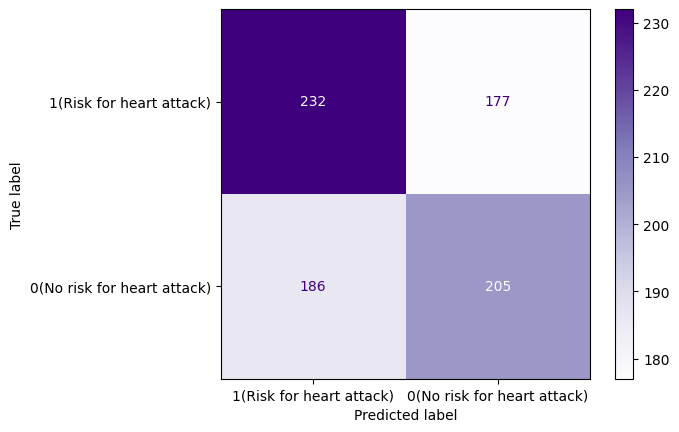

In [28]:
# Compute and print the confusion matrix
cm_gini3 = confusion_matrix(y_test2, y_pred_gini3)
print(cm_gini3)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini3, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (232):Represents the number of true positives (TP). This indicates that 232 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (177):Represents the number of false negatives (FN). This means that 177 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (186): Represents the number of false positives (FP). This shows that 186 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (205):Represents the number of true negatives (TN). This means that 205 instances without a risk of heart attack were correctly identified as not being at risk.


# Decision Tree 


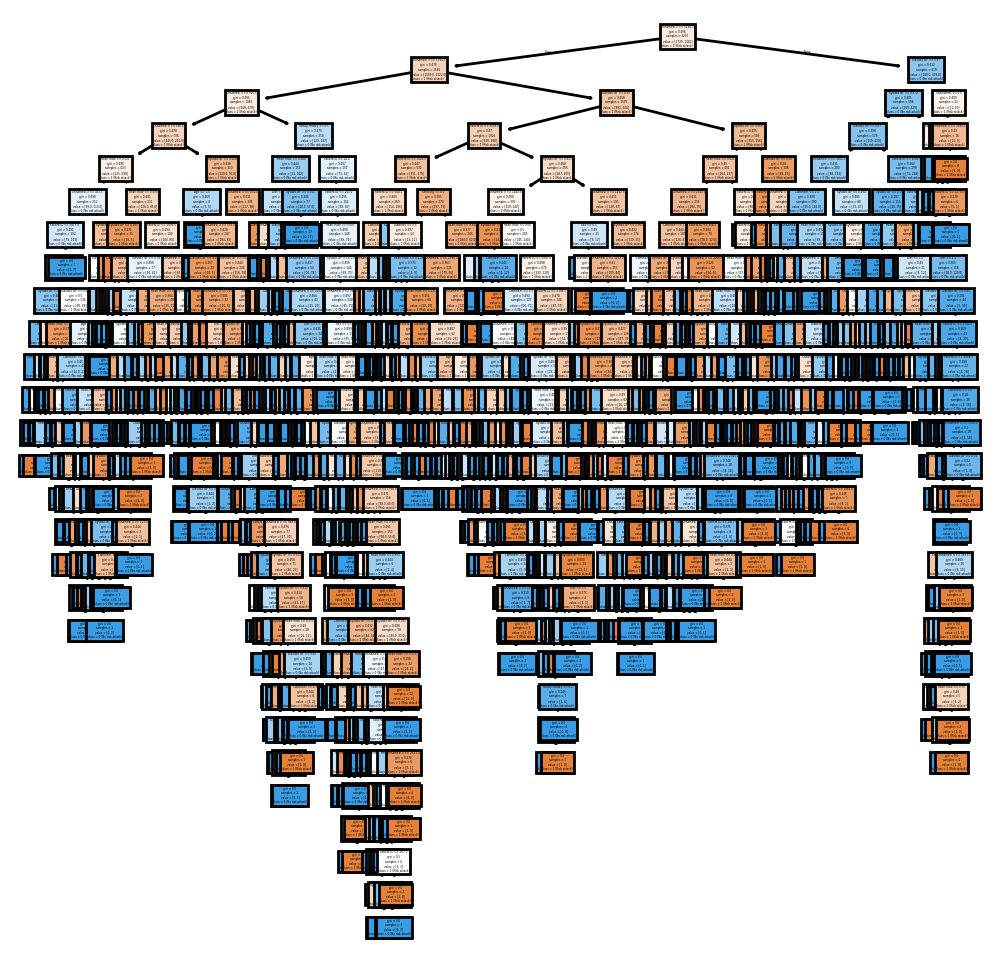

In [29]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, forming a tree-like structure.A decision tree is plotted for a classifier trained using the Gini index.The class values 1 and 0 to "Risk attack" and "No risk attack,".

The tree shows how the model classifies data, with each node representing a decision based on a feature.
However, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.

# Completing in model evaluation and selection:

In [30]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test2, y_pred_gini3)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini3[1, 1]
TN = cm_gini3[0, 0]
FP = cm_gini3[0, 1]
FN = cm_gini3[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.54625
Error Rate: 0.45375
Sensitivity: 0.5242966751918159
Specificity: 0.5672371638141809
Precision: 0.5366492146596858


These results represent key performance metrics for a classification model:

1-Accuracy (0.54625): The model correctly predicted the outcome 54.62% of the time. This is a moderate level of accuracy, indicating that the model is correct just over half of the time.

2-Error Rate (0.45375): The error rate is the complement of accuracy and shows the proportion of incorrect predictions. Here, 45.37% of the predictions were incorrect, meaning the model makes a significant number of errors.

3-Sensitivity ( 0.5242): Also known as recall or the true positive rate, sensitivity measures the model's ability to correctly identify positive cases (risk of attack). A sensitivity of 52.42% means the model identifies just over half of the actual positive cases but misses the other half.

4-Specificity (0.5672):or the true negative rate, indicates how well the model identifies negative cases (no risk of attack). A specificity of 56.72% means the model correctly identifies approximately 57% of the true negative cases.

5-Precision (0.5366): Precision measures the accuracy of the model's positive predictions. With a precision of 53.66%, the model’s positive predictions are correct just over half of the time, meaning it also produces a substantial number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 54.62%. While its specificity is better than its sensitivity, indicating it is slightly better at identifying negative cases, 
both sensitivity and precision are just above 52%, suggesting it struggles with balancing false positives and false negatives. 
The relatively high error rate (45.37%) suggests that the model could benefit from further improvements to make more accurate predictions.

# Evaluate The models of Gini Index

In [32]:
import jinja2

data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.5316666666666666", "0.4683333333333334", "0.4878048780487805", " 0.5718848940255591", " 0.5109489051094891"
    ],
    "60% training, 40% testing	": [
        "0.563125", "0.436875", " 0.529255319148962", "0.5931603773584906", 
        "0.5356662180349933"    
    ],
    "	80% training, 20% testing": [
        "0.54625", "0.45375", "0.5242966751918159", "0.5672371638141809","0.5366492146596858"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

,Percentages,"70% training, 30% testing","60% training, 40% testing","80% training, 20% testing"
0,Accuracy,0.5316666666666666,0.563125,0.54625
1,Error Rate,0.4683333333333334,0.436875,0.45375
2,Sensitivity,0.4878048780487805,0.529255319148962,0.5242966751918159
3,Specificity,0.5718848940255591,0.5931603773584906,0.5672371638141809
4,Precision,0.5109489051094891,0.5356662180349933,0.5366492146596858


Using these four metrics, we can determine which model is better suited for making predictions.

Accuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.

Error Rate: Represents the proportion of incorrect predictions made by the model.
Sensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.

Specificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.

Precision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.


The results show the following model performance across different data splits for training and testing:

Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.563125 (or 56.31%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.54625 (or 54.62%), and the model trained on 70% training and 30% testing with an accuracy of 0.53166 (or 53.16%).

Error Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.4683 (or 46.83%), followed by the model trained on 80% training and 20% testing with an error rate of 0.45375 (or 45.37%), and the model trained on 60% training and 40% testing with an error rate of 0.4368 (or 43.68%).

Sensitivity: The model trained on a 60% training set and 40% testing set achieved the highest sensitivity at 0.5292 (or 52.92%), followed closely by the model trained on 80% training and 20% testing with a sensitivity of 0.52429 (or 52.42%), and the model trained on 70% training and 30% testing with a sensitivity of 0.4878 (or 46.78%).

Specificity: Specificity remained consistent across all splits, with the model trained on 60% training and 40% testing achieving 0.5931 (or 59.31%), followed by 70% training and 30% testing with 0.5718 (or 57.18%), and 80% training and 20% testing with 0.5672 (or 56.72%).

Precision: The model trained on an 80% training set and 20% testing set obtained the highest precision at 0.5366 (or 53.66%), followed by the model trained on 60% training and 40% testing with 0.5356 (or 53.56%), and the model trained on 70% training and 30% testing with 0.5109 (or 51.09%).

Analysis:  
Based on these metrics, the *60% training and 40% testing split* appears to be the best choice for the model. 
This split achieves the highest accuracy (56.31%) and sensitivity (52.92%), which are key metrics for assessing overall performance and the ability to correctly identify positive cases.
Furthermore, it has the lowest error rate (43.68%), ensuring fewer incorrect predictions.
While the 80%-20% split performs slightly better in precision, the balance provided by the 60%-40% split across all metrics suggests it is better suited for reliable predictions.

# Clustering